In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Dropout
# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# convert data to categorial vector representation
from keras.utils import to_categorical


# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder

# resample signal to n samples
from scipy.signal import resample

import os, inspect

from recognizer import preprocess, train_templates, classify
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt

import seaborn as sn

import time

Hyperparameters that are specific to gesture recognition go HERE

In [2]:
NUM_POINTS = 64

In [3]:
def import_dataset (directory:str):
    data_X = []
    data_y = []

    for root, subdirs, files in os.walk(directory):
        if 'ipynb_checkpoint' in root:
            continue
        
        if len(files) > 0:
            for f in tqdm(files):
                if '.xml' in f:
                    fname = f.split('.')[0]
                    label = fname[:-2]
                    
                    xml_root = ET.parse(f'{root}/{f}').getroot()
                    
                    points = []
                    for element in xml_root.findall('Point'):
                        x = element.get('X')
                        y = element.get('Y')
                        points.append([x, y])
                        
                    points = np.array(points, dtype=float)
                    
                    data_X.append(points)
                    data_y.append(label)
        
    #data_X = np.array(data_X)
    #data_y = np.array(data_y)
    return data_X, data_y

In [4]:
# helper function to preprocess an array of gestures.
def preprocess_batch(raw_data:np.ndarray|list, num_points=NUM_POINTS, size_x=100, size_y=100):
    data_X = []
    print("PREPROCESSING...")
    for gesture in tqdm(raw_data):
        data_X.append(preprocess(gesture, NUM_POINTS))

    data_X = np.asarray(data_X)
    return data_X
    

Reading, splitting and preprocessing of the data. Most of this code is from the exercise notebook

In [5]:
print("IMPORTING...")

raw_test_X, test_y = import_dataset("test")
raw_data_X, data_y = import_dataset("xml_logs")


data_X = preprocess_batch(raw_data_X)
test_X = preprocess_batch(raw_test_X)

labels = np.unique(data_y)

encoder = LabelEncoder()
encoder.fit(data_y)
print(encoder.classes_)
print(np.unique(data_y))
data_y = encoder.transform(data_y)
test_y = encoder.transform(test_y)
print(np.unique(data_y))

test_y = to_categorical(test_y)
data_y = to_categorical(data_y)


train_X, val_X, train_y, val_y = train_test_split(data_X, data_y, test_size=0.2, random_state=19061257)

train_X = np.asarray(train_X)
val_X = np.asarray(val_X)
train_y = np.asarray(train_y)
val_y = np.asarray(val_y)


test_y = np.asarray(test_y)
test_X = np.asarray(test_X)

IMPORTING...


  0%|          | 0/237 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

PREPROCESSING...


  0%|          | 0/5280 [00:00<?, ?it/s]

PREPROCESSING...


  0%|          | 0/237 [00:00<?, ?it/s]

['arrow' 'caret' 'check' 'circle' 'delete_mark' 'left_curly_brace'
 'left_sq_bracket' 'pigtail' 'question_mark' 'rectangle'
 'right_curly_brace' 'right_sq_bracket' 'star' 'triangle' 'v' 'x']
['arrow' 'caret' 'check' 'circle' 'delete_mark' 'left_curly_brace'
 'left_sq_bracket' 'pigtail' 'question_mark' 'rectangle'
 'right_curly_brace' 'right_sq_bracket' 'star' 'triangle' 'v' 'x']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


c:\Users\Maxim\Documents\Uni\Master\Semester 2\ITT\Ass 6\assignment-6-gesture-recognition-MaximilianKilger\recognizer.py:69: RuntimeWarning: invalid value encountered in divide
  points[:,0] = (points[:,0] - min_x) / (max_x - min_x) * new_size[0]
c:\Users\Maxim\Documents\Uni\Master\Semester 2\ITT\Ass 6\assignment-6-gesture-recognition-MaximilianKilger\recognizer.py:70: RuntimeWarning: invalid value encountered in divide
  points[:,1] = (points[:,1] - min_y) / (max_y - min_y) * new_size[1]


In [6]:
print(data_X.dtype)
print(train_y.dtype)


float64
float64


## Model 1

Defining the architecture for model 1. This one heavily borrows from the one from the exercise, which I know works.

I leave the model mostly as-is, as a baseline while I try to reduce parameter count for model 2 and 3. It has 62450 parameters.

In [7]:
model_1_hyperparams = {
    "epochs": 20,
    "batch_size": 32,
    "num_LSTM_layers": 1,
    "num_LSTM_neurons": 64,
    "activation_LSTM": "tanh",
    "num_dense_layers": 2,
    "num_dense_neurons": 32,
    "activation_dense": "relu",
    "loss": "categorical_crossentropy",
    "use_dropout":False,
    "dropout_rate": 0.2,
    "metrics":['accuracy']
}

In [8]:
hp = model_1_hyperparams # shorthand for convenience
model_1 = Sequential()
model_1.add(Input((NUM_POINTS, 2)))
for i in range(hp["num_LSTM_layers"]):
    model_1.add(LSTM(hp["num_LSTM_neurons"], activation=hp["activation_LSTM"]))

if hp["use_dropout"]:
    model_1.add(Dropout(hp["dropout_rate"]))

for i in range(hp["num_dense_layers"]):
    model_1.add(Dense(hp["num_dense_neurons"], activation=hp["activation_dense"]))
model_1.add(Dense(len(set(labels)), activation="softmax"))

model_1.compile(loss=hp["loss"], optimizer="adam", metrics=hp["metrics"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
hp = model_1_hyperparams # shorthand for convenience
history_1 = model_1.fit(
    train_X,
    train_y,
    epochs = hp["epochs"],
    batch_size=hp["batch_size"],
    validation_data=(val_X, val_y),
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2714 - loss: 2.3039 - val_accuracy: 0.7879 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8408 - loss: 0.6277 - val_accuracy: 0.9015 - val_loss: 0.3604 - learning_rate: 0.0010
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9345 - loss: 0.2631 - val_accuracy: 0.9451 - val_loss: 0.2194 - learning_rate: 0.0010
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9569 - loss: 0.1759 - val_accuracy: 0.9470 - val_loss: 0.1882 - learning_rate: 0.0010
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9587 - loss: 0.1409 - val_accuracy: 0.9640 - val_loss: 0.1393 - learning_rate: 0.0010
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9766 - loss: 0.0943 - val_accuracy: 0.9754 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9752 - loss: 0.

In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,450 (243.95 KB)

 Trainable params: 20,816 (81.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,634 (162.64 KB)

## Model 2

In [11]:
model_2_hyperparams = {
    "epochs": 20,
    "batch_size": 32,
    "num_LSTM_layers": 4,
    "num_LSTM_neurons": 16,
    "activation_LSTM": "tanh",
    "num_dense_layers": 2,
    "num_dense_neurons": 32,
    "activation_dense": "relu",
    "loss": "categorical_crossentropy",
    "use_dropout":False,
    "dropout_rate": 0.2,
    "metrics":['accuracy']
}

For this model, I try to reduce parameter count by reducing the size of the LSTM layers. I first performed binary search to find the lowest parameter number with an accuracy score above 90%. This didn't work, as all neuron counts under 64 resulted in insufficient accuracies. 

I then tried to split the 64-neuron-LSTM layer in two 32-neuron-LSTM layers. It resulted in about a 25 % reduction in parameter count (46322 params) with roughly equal accuracy, at the cost of increased prediction time.

I tried it with 4 LSTM layers of 16 neurons each next. This dropped the number of parameters to 29042, caused accuracy to drop about 4 % and quadrupled prediction time compared to the baseline. I decided to stop here to keep accuracy above 80%.

In [12]:
hp = model_2_hyperparams # shorthand for convenience
model_2 = Sequential()
model_2.add(Input((NUM_POINTS, 2)))
for i in range(hp["num_LSTM_layers"]):
    if i != hp["num_LSTM_layers"]-1:
        model_2.add(LSTM(hp["num_LSTM_neurons"], activation=hp["activation_LSTM"], return_sequences=True))

    else:
        model_2.add(LSTM(hp["num_LSTM_neurons"], activation=hp["activation_LSTM"]))

if hp["use_dropout"]:
    model_2.add(Dropout(hp["dropout_rate"]))

for i in range(hp["num_dense_layers"]):
    model_2.add(Dense(hp["num_dense_neurons"], activation=hp["activation_dense"]))
model_2.add(Dense(len(set(labels)), activation="softmax"))

model_2.compile(loss=hp["loss"], optimizer="adam", metrics=hp["metrics"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [13]:
hp = model_2_hyperparams # shorthand for convenience
history_2 = model_2.fit(
    train_X,
    train_y,
    epochs = hp["epochs"],
    batch_size=hp["batch_size"],
    validation_data=(val_X, val_y),
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.1585 - loss: 2.5423 - val_accuracy: 0.5199 - val_loss: 1.4016 - learning_rate: 0.0010
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5952 - loss: 1.1075 - val_accuracy: 0.7822 - val_loss: 0.6965 - learning_rate: 0.0010
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7654 - loss: 0.6132 - val_accuracy: 0.8343 - val_loss: 0.5190 - learning_rate: 0.0010
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8352 - loss: 0.4833 - val_accuracy: 0.8968 - val_loss: 0.3736 - learning_rate: 0.0010
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9127 - loss: 0.3166 - val_accuracy: 0.9280 - val_loss: 0.2804 - learning_rate: 0.0010
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9305 - loss: 0.2437 - val_accuracy: 0.8475 - val_loss: 0.4435 - learning_rate: 0.0010
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9280 - loss: 0.

In [14]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64, 16)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,042 (113.45 KB)

 Trainable params: 9,680 (37.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,362 (75.64 KB)

## Model 3

In [15]:
model_3_hyperparams = {
    "epochs": 20,
    "batch_size": 32,
    "num_LSTM_layers": 2,
    "num_LSTM_neurons": 32,
    "activation_LSTM": "tanh",
    "num_dense_layers": 2,
    "num_dense_neurons": 16,
    "activation_dense": "relu",
    "loss": "categorical_crossentropy",
    "use_dropout":False,
    "dropout_rate": 0.2,
    "metrics":['accuracy']
}

For Model 3, I tried to reduce parameters in the dense half of the network. I started by reducing the number of neurons in the dense layers from 32 to 16, resulting in a parameter count of 56210. Reducing the number of neurons to 8 resulted in a parameter count of 53666. 

Next, I experimented with distributing the same number of neurons on multiple consecutive layers. With 4 16-neuron layers, parameter count shrank to 57842. With 8 8-neuron layers, parameter count went down to 54962. 

Finally, I tried going form two 32-neuron layers to one. This resulted in a parameter count of 59,282. A mild reduction.

Obviously, the dense layers are not the place to go for parameter count reduction. I settled on two 16-neuron layers for the final analysis and combined them with the double-32-neuron-layer-architecture found in model 2.

In [16]:
hp = model_3_hyperparams # shorthand for convenience
model_3 = Sequential()
model_3.add(Input((NUM_POINTS, 2)))
for i in range(hp["num_LSTM_layers"]):
    if i != hp["num_LSTM_layers"]-1:
        model_3.add(LSTM(hp["num_LSTM_neurons"], activation=hp["activation_LSTM"], return_sequences=True))

    else:
        model_3.add(LSTM(hp["num_LSTM_neurons"], activation=hp["activation_LSTM"]))

if hp["use_dropout"]:
    model_3.add(Dropout(hp["dropout_rate"]))

for i in range(hp["num_dense_layers"]):
    model_3.add(Dense(hp["num_dense_neurons"], activation=hp["activation_dense"]))
model_3.add(Dense(len(set(labels)), activation="softmax"))

model_3.compile(loss=hp["loss"], optimizer="adam", metrics=hp["metrics"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [17]:
hp = model_3_hyperparams # shorthand for convenience
history_3 = model_3.fit(
    train_X,
    train_y,
    epochs = hp["epochs"],
    batch_size=hp["batch_size"],
    validation_data=(val_X, val_y),
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.2099 - loss: 2.4606 - val_accuracy: 0.5994 - val_loss: 1.1939 - learning_rate: 0.0010
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6752 - loss: 0.9956 - val_accuracy: 0.8078 - val_loss: 0.5737 - learning_rate: 0.0010
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8296 - loss: 0.4939 - val_accuracy: 0.8693 - val_loss: 0.3955 - learning_rate: 0.0010
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9039 - loss: 0.3339 - val_accuracy: 0.9309 - val_loss: 0.2862 - learning_rate: 0.0010
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9378 - loss: 0.2635 - val_accuracy: 0.9498 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9614 - loss: 0.1405 - val_accuracy: 0.9612 - val_loss: 0.1555 - learning_rate: 0.0010
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9688 - loss: 0.

In [18]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 64, 32)         │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           272 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,618 (162.57 KB)

 Trainable params: 13,872 (54.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,746 (108.39 KB)

## Training the One-Dollar classifier

(4224, 16)
(4224, 64, 2)


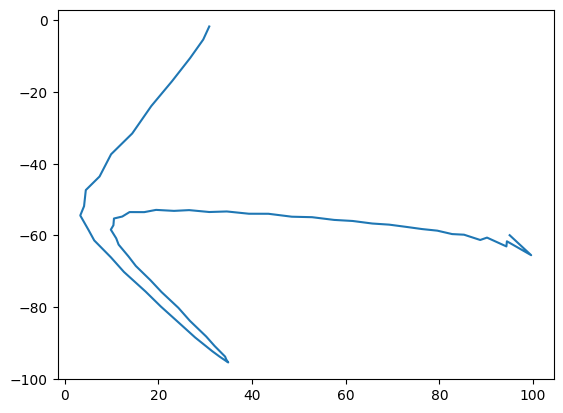

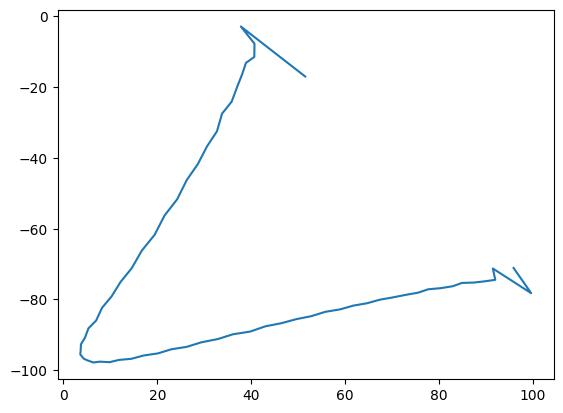

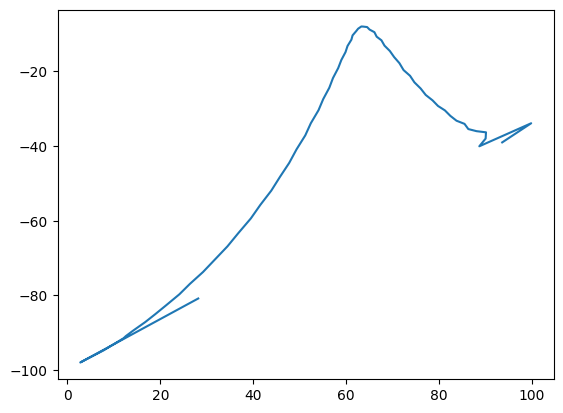

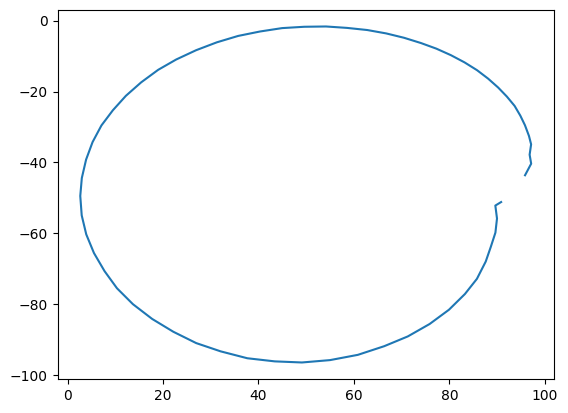

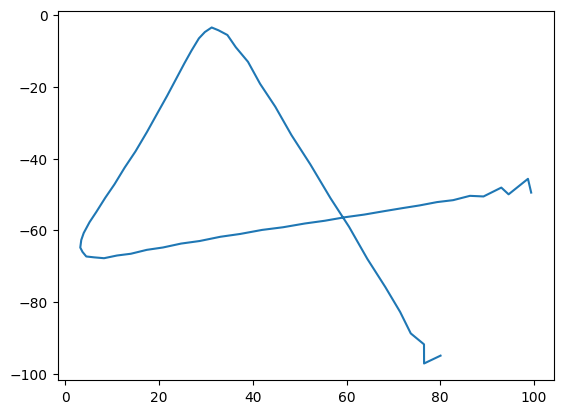

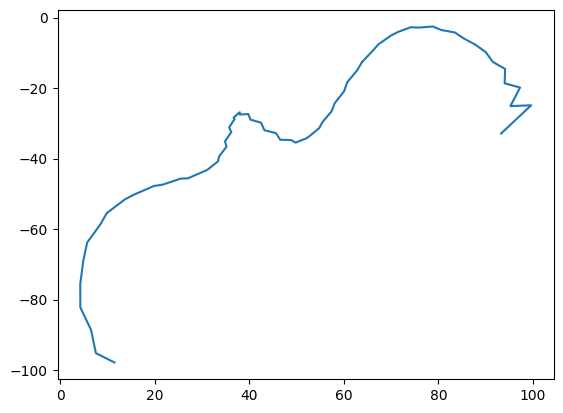

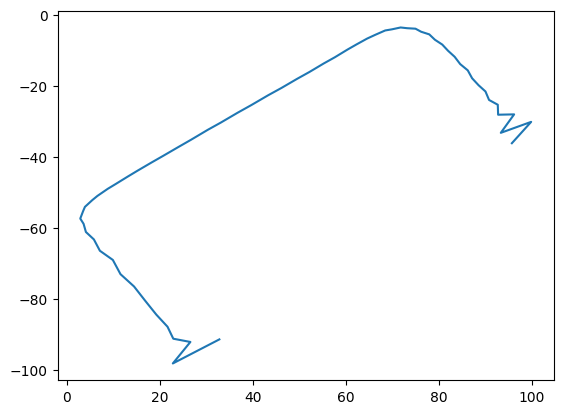

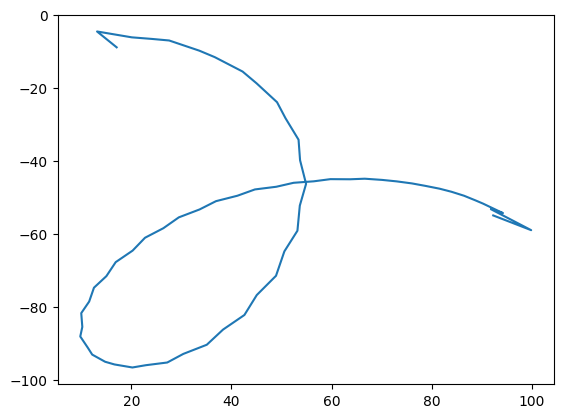

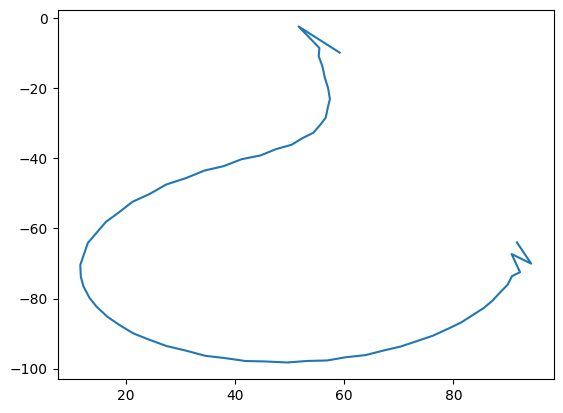

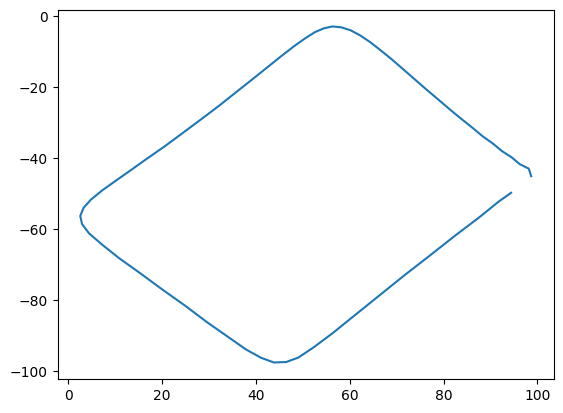

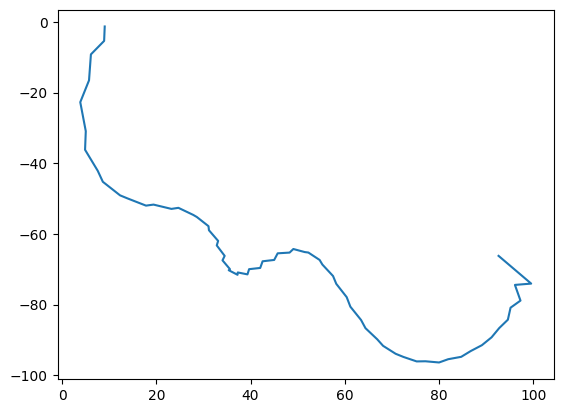

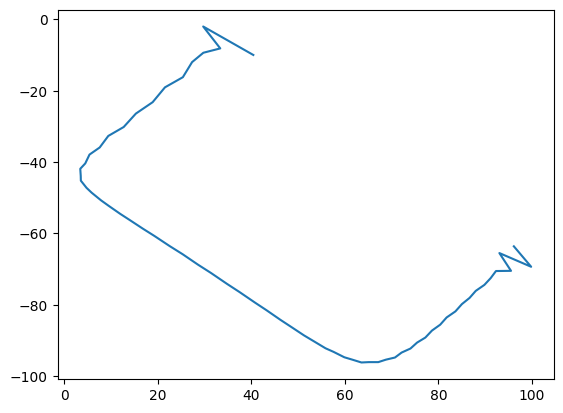

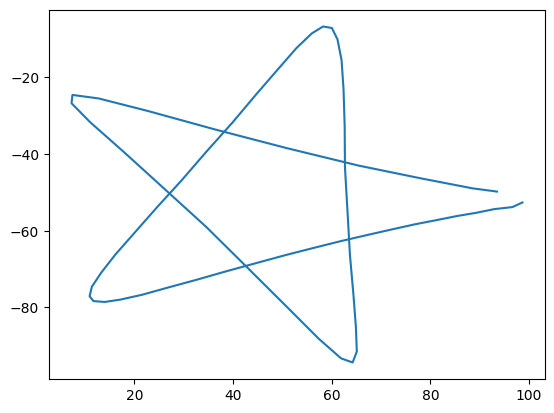

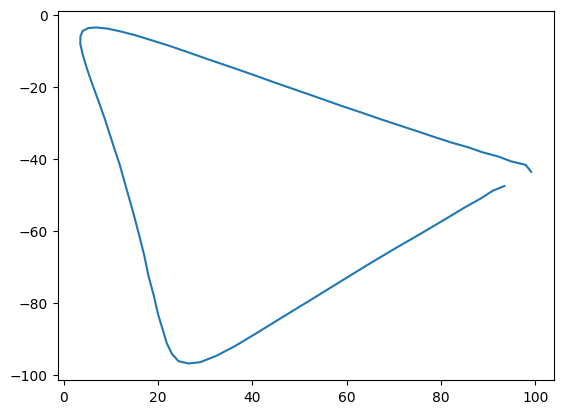

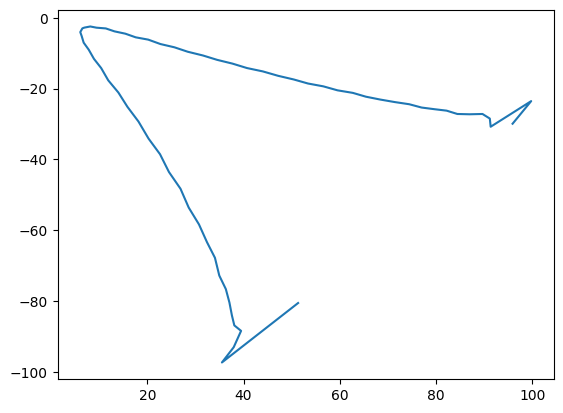

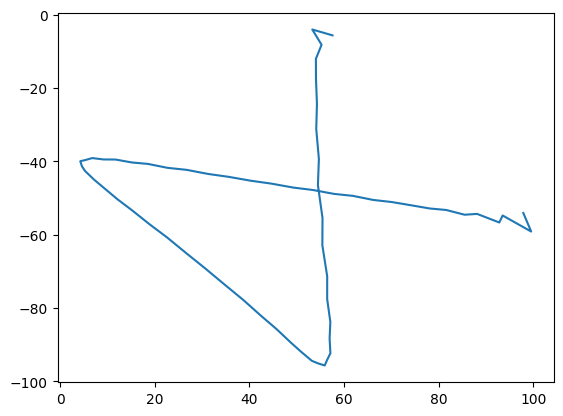

In [40]:
print(train_y.shape)
print(train_X.shape)
train_y_un_one_hotted = np.argmax(train_y, axis=1)
train_y_decoded = encoder.inverse_transform(train_y_un_one_hotted)
templates = train_templates(train_X, train_y_decoded)

# Evaluation

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy for model 1: 0.8607594936708861
Prediction time for model 1 with 237 elements: 0.3389911651611328 s


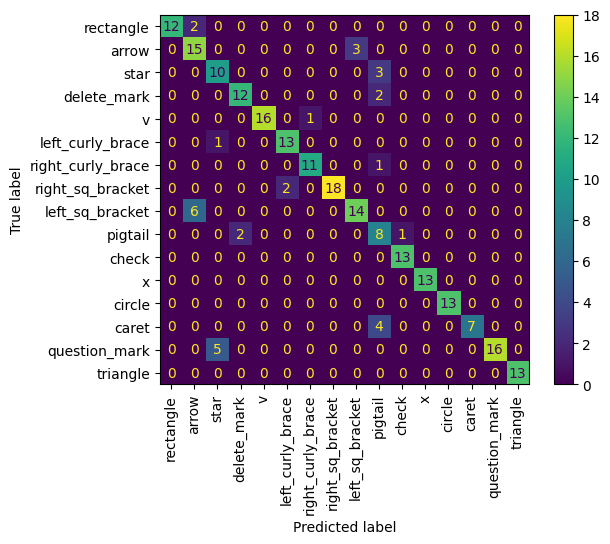

In [41]:
ts = time.time()
predicted_model_1 = model_1.predict(test_X)
pred_time_1 = time.time()-ts
predicted_model_1_decoded = []
for i, x in enumerate(predicted_model_1):
    y = encoder.inverse_transform([x.argmax()])
    predicted_model_1_decoded.append(y[0])
predicted_model_1_decoded = np.array(predicted_model_1_decoded)

test_y_decoded = []
for i, x in enumerate(test_y):
    y = encoder.inverse_transform([x.argmax()])
    test_y_decoded.append(y[0])
test_y_decoded = np.array(test_y_decoded)

accuracy_model_1 = accuracy_score(test_y_decoded, predicted_model_1_decoded)
print(f"Accuracy for model 1: {accuracy_model_1}")
print(f"Prediction time for model 1 with {len(test_X)} elements: {pred_time_1} s")
confusion_mat_model_1 = confusion_matrix(test_y_decoded, predicted_model_1_decoded)
ConfusionMatrixDisplay(confusion_mat_model_1, display_labels=set(test_y_decoded)).plot(ax=plt.gca())
plt.xticks(rotation=90, ha='center')
pass


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Accuracy for model 2: 0.729957805907173
Prediction time for model 2 with 237 elements: 0.8749995231628418 s


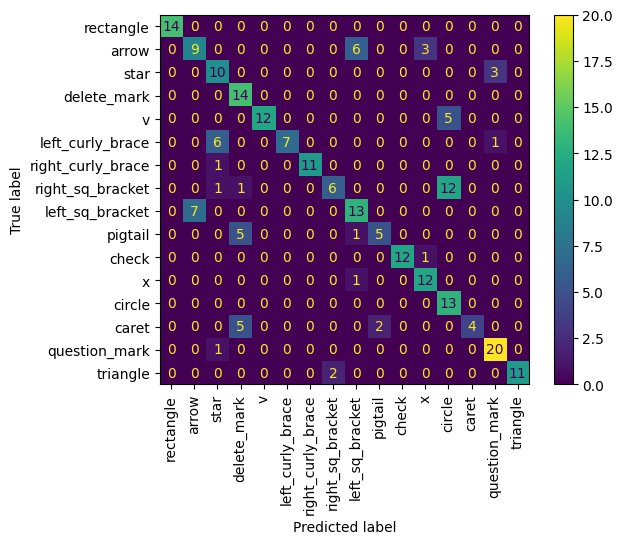

In [42]:
ts = time.time()
predicted_model_2 = model_2.predict(test_X)
pred_time_2 = time.time()-ts
predicted_model_2_decoded = []
for i, x in enumerate(predicted_model_2):
    y = encoder.inverse_transform([x.argmax()])
    predicted_model_2_decoded.append(y[0])
predicted_model_2_decoded = np.array(predicted_model_2_decoded)

accuracy_model_2 = accuracy_score(test_y_decoded, predicted_model_2_decoded)
print(f"Accuracy for model 2: {accuracy_model_2}")
print(f"Prediction time for model 2 with {len(test_X)} elements: {pred_time_2} s")
confusion_mat_model_2 = confusion_matrix(test_y_decoded, predicted_model_2_decoded)
ConfusionMatrixDisplay(confusion_mat_model_2, display_labels=set(test_y_decoded)).plot(ax=plt.gca())
plt.xticks(rotation=90, ha='center')
pass


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Accuracy for model 3: 0.8565400843881856
Prediction time for model 3 with 237 elements: 0.5909931659698486 s


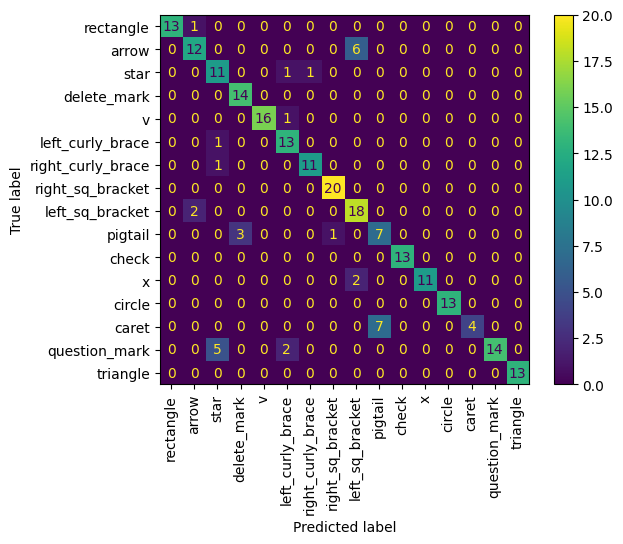

In [43]:
ts = time.time()
predicted_model_3 = model_3.predict(test_X)
pred_time_3 = time.time()-ts
predicted_model_3_decoded = []
for i, x in enumerate(predicted_model_3):
    y = encoder.inverse_transform([x.argmax()])
    predicted_model_3_decoded.append(y[0])
predicted_model_3_decoded = np.array(predicted_model_3_decoded)

accuracy_model_3 = accuracy_score(test_y_decoded, predicted_model_3_decoded)
print(f"Accuracy for model 3: {accuracy_model_3}")
print(f"Prediction time for model 3 with {len(test_X)} elements: {pred_time_3} s")
confusion_mat_model_3 = confusion_matrix(test_y_decoded, predicted_model_3_decoded)
ConfusionMatrixDisplay(confusion_mat_model_3, display_labels=set(test_y_decoded)).plot(ax=plt.gca())
plt.xticks(rotation=90, ha='center')
pass

Accuracy for 1$-recognizer: 0.8143459915611815
Prediction time for 1$-recognizer with 237 elements: 5.222007513046265 s


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'rectangle'),
  Text(1, 0, 'arrow'),
  Text(2, 0, 'star'),
  Text(3, 0, 'delete_mark'),
  Text(4, 0, 'v'),
  Text(5, 0, 'left_curly_brace'),
  Text(6, 0, 'right_curly_brace'),
  Text(7, 0, 'right_sq_bracket'),
  Text(8, 0, 'left_sq_bracket'),
  Text(9, 0, 'pigtail'),
  Text(10, 0, 'check'),
  Text(11, 0, 'x'),
  Text(12, 0, 'circle'),
  Text(13, 0, 'caret'),
  Text(14, 0, 'question_mark'),
  Text(15, 0, 'triangle')])

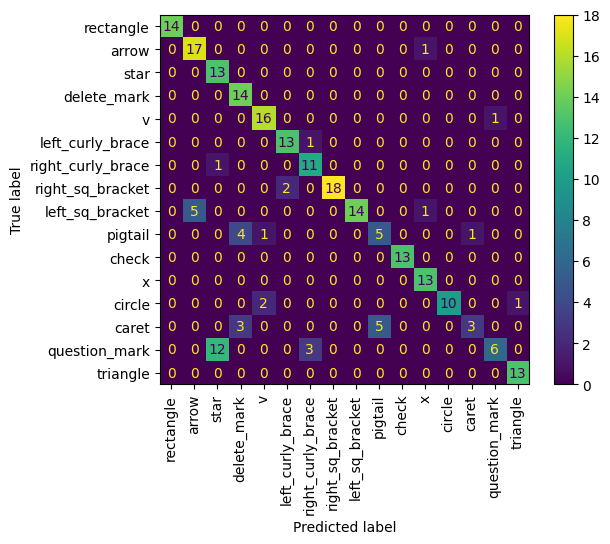

In [50]:
predicted_one_dollar = []
ts = time.time()
for i, gesture in enumerate(test_X):
    predicted_one_dollar.append(classify(gesture, templates)[0])


pred_time_one_dollar = time.time()-ts
for i, prediction in enumerate(predicted_one_dollar):
    if prediction is None:
        predicted_one_dollar[i] = "triangle"
accuracy_one_dollar = accuracy_score(test_y_decoded, predicted_one_dollar)

print(f"Accuracy for 1$-recognizer: {accuracy_one_dollar}")
print(f"Prediction time for 1$-recognizer with {len(test_X)} elements: {pred_time_one_dollar} s")

confusion_mat_one_dollar = confusion_matrix(test_y_decoded, predicted_one_dollar)
ConfusionMatrixDisplay(confusion_mat_one_dollar, display_labels=set(test_y_decoded)).plot(ax=plt.gca())
plt.xticks(rotation=90, ha='center')

In [ ]:
sn.barplot()